In [ ]:
# Your work for Part 2 here!
# Remember to organize your work by including your own markdown cells!

# Step 1, Reading the Cleaned CSV + Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
cdf = pd.read_csv('cleaned_ameshousing.csv')

In [3]:
cdf.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,6,141.0,31770,0,-1.0,1,...,0,-1.0,-1,-1,0,5,2010,0,0,215000
1,1,2,526350040,20,5,80.0,11622,0,-1.0,0,...,0,-1.0,1,-1,0,6,2010,0,0,105000
2,2,3,526351010,20,6,81.0,14267,0,-1.0,1,...,0,-1.0,-1,1,12500,6,2010,0,0,172000
3,3,4,526353030,20,6,93.0,11160,0,-1.0,0,...,0,-1.0,-1,-1,0,4,2010,0,0,244000
4,4,5,527105010,60,6,74.0,13830,0,-1.0,1,...,0,-1.0,1,-1,0,3,2010,0,0,189900


### Model Documentation
1. used these features *'Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 
            'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 
            'Bsmt Qual', 'Full Bath', 'Year Built', 'Garage Yr Blt', 
            'Garage Finish', 'Year Remod/Add', 'Mas Vnr Area', 'Fireplace Qu', 
            'TotRms AbvGrd',* R squared score of approx 0.798

2. used these extra features *'Heating QC','Fireplaces','BsmtFin SF 1','Garage Type'*
                                R squared of about 0.811

3. added these extra features *'Lot Frontage', 'Lot Shape', 'Lot Area'*
                                R squared of 0.817


4. added these features *'Exterior 1st','Roof Style'*
                            R Squared of 0.818

5. messed aroundwith the test_size, a test size of 0.30 made the R squared score 0.831

6. added these features *'Wood Deck SF','Open Porch SF'* didn't change a thing, though I may keep it, I was also running out of features that would be viable, so I ran the rmse score, and it is pretty good, so I think I have built a compotent model *I am happy with it right now*

7. tried to expirement by including nearly every column except the Sale Type or Sale Condition, training test did better, but the testing data score did worse then before '0.814'

8. tried to add these features *'MS Zoning','Exterior 2nd', 'Electrical'* mad the $R^2$ score worse
                                R squared score 0.8307

9. added *'Wood Deck SF','Open Porch SF'* again, and I actually noticed a change in my $R^2$ score
                                                            R squared was 0.832

# Step 2, Modeling

<Axes: >

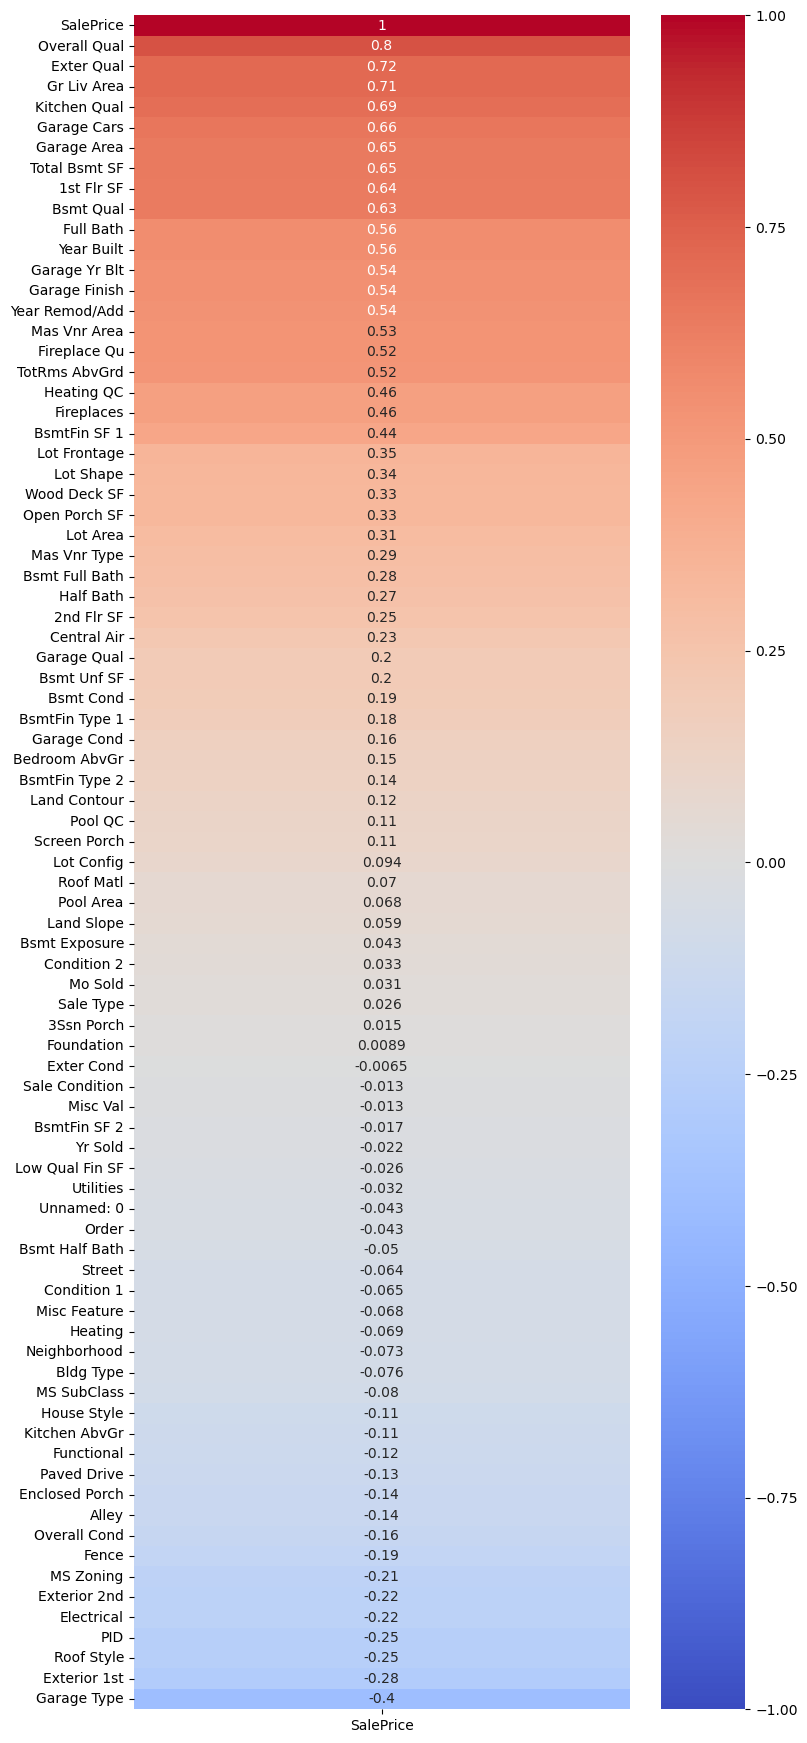

In [5]:
    plt.figure(figsize=(8,22))
    sns.heatmap(cdf.corr(numeric_only= True)[['SalePrice']].sort_values(by = 'SalePrice', ascending= False), 
           annot = True, 
           vmin= -1, 
           vmax = 1, 
           cmap = 'coolwarm')

In [ ]:
'Heating QC','Fireplaces','BsmtFin SF 1','Garage Type'

In [ ]:
# Daniels Features
# features = ['Overall Qual_codes', 'Exter Qual_codes', 'Kitchen Qual_codes', 'Bsmt Qual_codes', \
#            'Heating QC_codes', 'Garage Qual_codes', 'Gr Liv Area', \
#            'Lot Shape_codes', 'Total Full Bath', 'Total Half Bath', \
#            'TotRms AbvGrd', 'Garage Area', 'Overall Cond_codes', 'Misc Val', \
#            'Total Bsmt SF', 'Bsmt Cond_codes', 'Garage Area', 'Year Built', \
#             'Year Remod/Add', 'Garage Yr Blt']
# nominal_features = ['House Style', 'Bldg Type', 'Sale Condition', \
#                     'Neighborhood', 'Misc Feature']

# Kevins Features







# Features to add
- 'Lot Frontage', 'Lot Shape', 'Lot Area' # for model three
- 'Exterior 1st','Roof Style'
- 'Wood Deck SF','Open Porch SF'
- 'MS Zoning','Exterior 2nd', 'Electrical'
- 'Mas Vnr Type','Bsmt Full Bath','Half Bath','2nd Flr SF'
# Features I tried to remove
- 'Exterior 1st','Roof Style' # wasn't super good

In [61]:
X = cdf.drop(columns = ['SalePrice','Sale Type','Sale Condition'])

y = cdf['SalePrice']

In [186]:
features = ['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 
            'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 
            'Bsmt Qual', 'Full Bath', 'Year Built', 'Garage Yr Blt', 
            'Garage Finish', 'Year Remod/Add', 'Mas Vnr Area', 'Fireplace Qu', 
            'TotRms AbvGrd', 'Heating QC','Fireplaces','BsmtFin SF 1','Garage Type', 
            'Lot Frontage', 'Lot Shape', 'Lot Area', 'Exterior 1st','Roof Style', 
            'Wood Deck SF','Open Porch SF']

X = cdf[features]

y = cdf['SalePrice']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)

In [188]:
lr = LinearRegression()

In [189]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [190]:
y_test

2063     79000
1321    204000
859     185900
408     229800
629     147983
         ...  
2032    146000
123     107500
798     180000
394     260000
1027     46500
Name: SalePrice, Length: 683, dtype: int64

In [191]:
lr.predict(X_test)

array([112387.16743806, 211324.9384074 , 180489.1780107 , 208048.97257152,
       133410.15358103, 188522.07627306, 140406.02495864, 150370.60230834,
       236434.14371657, 169493.03605172, 167612.8787386 , 191055.28128278,
        93450.00288905, 314664.00654735, 100730.99034562, 195821.29675388,
       193769.35451219, 162446.3755798 , 199745.61859084, 331660.73770205,
       221329.37568133, 207702.83250344, 144086.34572209,  97904.07900166,
       226508.86989581, 178105.23071029, 644428.16285117, 129793.98764269,
       169339.74556616, 131705.00956761, 112676.60454806, 105968.38254989,
       357321.48674357, 171116.29558226, 110194.10035568, 187576.37549971,
       119644.76652937, 217612.92635486, 140545.03585149, 274887.79832275,
       206817.34799896, 240669.41232019, 214213.88558189, 324259.57525802,
       169548.39937667, 220879.75656875, 128715.16547192, 103158.47851528,
       241859.54871721, 209196.70355377, 212963.21357998, 300532.86050419,
       115239.0071754 , 1

# Step 3 , Evaluation

### $R^2$ score

In [192]:
lr.score(X_train, y_train)

0.8331514536086546

In [193]:
lr.score(X_test, y_test)

0.8320481561003746

### $RMSE$ score

In [194]:
# Predictions
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
baseline_preds = np.full_like(y_test, y_test.mean())

In [195]:
# Training set
np.sqrt(mean_squared_error(y_train, train_preds))

np.float64(33714.76308736773)

In [196]:
# Testing set
np.sqrt(mean_squared_error(y_test, test_preds))

np.float64(34861.479617030156)

In [197]:
# Baseline set
np.sqrt(mean_squared_error(y_test, baseline_preds))

np.float64(85065.49386207393)